In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 

# nltk.download('stopwords')   
# nltk.download('punkt')       
# nltk.download('wordnet')
# nltk.download('omw-1.4')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score , mean_squared_error

# EDA

In [2]:
data=pd.read_csv(r'D:\data\spam.csv')
data.sample(5)

,Category,Message
5117,ham,Aslamalaikkum....insha allah tohar beeen muht ...
2142,ham,Alright took the morphine. Back in yo.
5082,ham,Amazing : If you rearrange these letters it gi...
2248,spam,Back 2 work 2morro half term over! Can U C me ...
4226,ham,The world suffers a lot... Not because of the ...


In [3]:
data.shape

(5572, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.describe(include="object")

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [7]:
data.duplicated().sum()

415

In [8]:
data=data.drop_duplicates(keep = 'first')
data.duplicated().sum()

0

In [9]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data["Category"].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

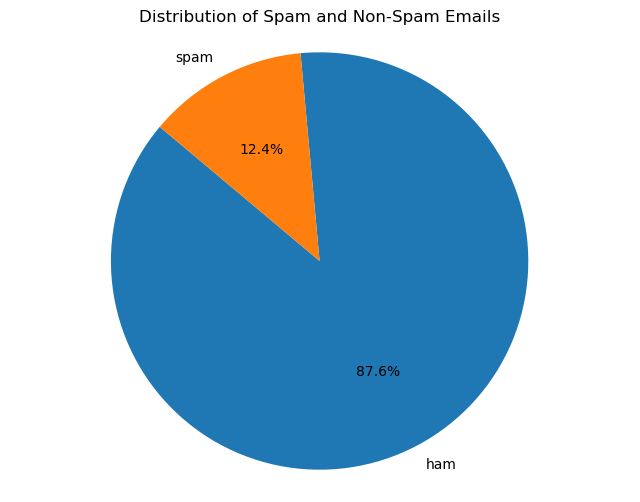

In [11]:
plt.figure(figsize=(8, 6),facecolor='white')
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal') 
plt.show()

Average Length of Spam Emails: 137.1185647425897
Average Length of Ham Emails: 70.86935341009743


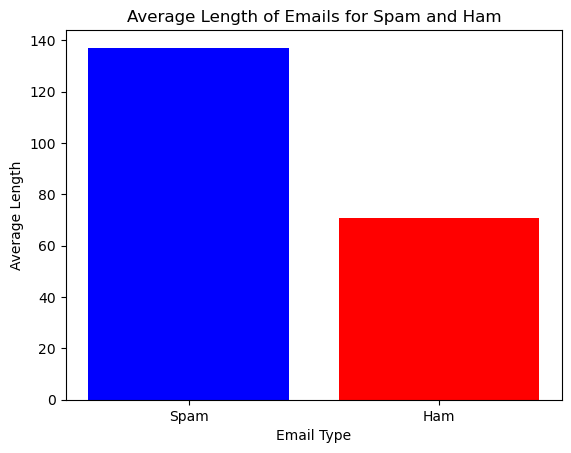

Average Sentence of Spam Emails: 2.9672386895475817
Average Sentence of Ham Emails: 1.8062444641275466


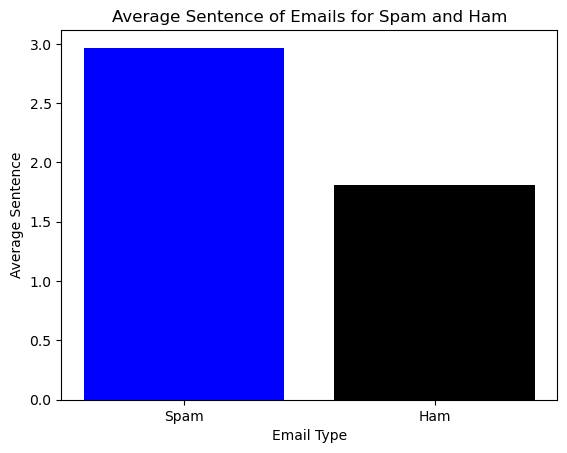

Average Words of Spam Emails: 27.66770670826833
Average Words of Ham Emails: 17.264836138175376


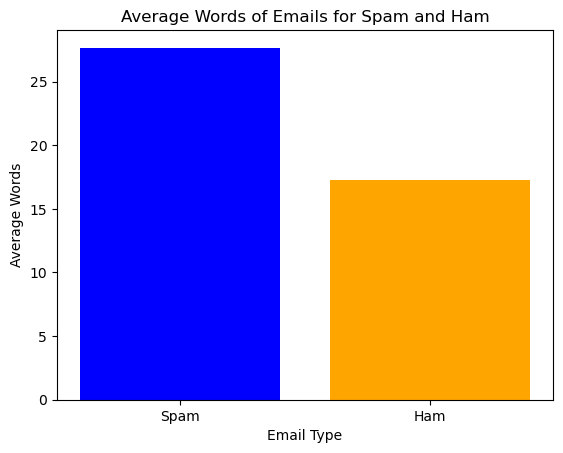

In [12]:
data['Length'] = data['Message'].apply(len)
avg_length_spam = data[data['Category'] == 'spam']['Length'].mean()
avg_length_ham = data[data['Category'] == 'ham']['Length'].mean()
print("Average Length of Spam Emails:", avg_length_spam)
print("Average Length of Ham Emails:", avg_length_ham)
plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham],color=['Blue', 'red'])
plt.title('Average Length of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()



data['num_sentence'] = data['Message'].apply(sent_tokenize).apply(len)
data['num_words'] = data['Message'].apply(word_tokenize).apply(len)

avg_sentence_spam = data[data['Category'] == 'spam']['num_sentence'].mean()
avg_sentence_ham = data[data['Category'] == 'ham']['num_sentence'].mean()
print("Average Sentence of Spam Emails:", avg_sentence_spam)
print("Average Sentence of Ham Emails:", avg_sentence_ham)
plt.bar(['Spam', 'Ham'], [avg_sentence_spam, avg_sentence_ham], color=['Blue', 'black'])
plt.title('Average Sentence of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Sentence')
plt.show()

avg_word_spam = data[data['Category'] == 'spam']['num_words'].mean()
avg_word_ham = data[data['Category'] == 'ham']['num_words'].mean()
print("Average Words of Spam Emails:", avg_word_spam)
print("Average Words of Ham Emails:", avg_word_ham)
plt.bar(['Spam', 'Ham'], [avg_word_spam, avg_word_ham], color=['Blue', 'orange'])
plt.title('Average Words of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Words')
plt.show()

Correlation coefficient between email length and spam classification: 0.37440862510786704


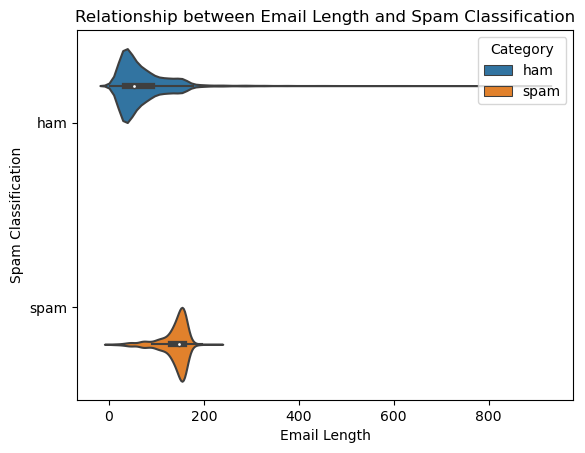

In [13]:
correlation = data['Length'].corr((data['Category'] == 'spam').astype(int))
print("Correlation coefficient between email length and spam classification:", correlation)

sbn.violinplot(data=data, x='Length', y='Category', hue='Category')
plt.xlabel('Email Length')
plt.ylabel('Spam Classification')
plt.title('Relationship between Email Length and Spam Classification')
plt.show()

The Relationship between Features are                  Length  num_words  num_sentence
Length        1.000000   0.966164      0.636615
num_words     0.966164   1.000000      0.683371
num_sentence  0.636615   0.683371      1.000000


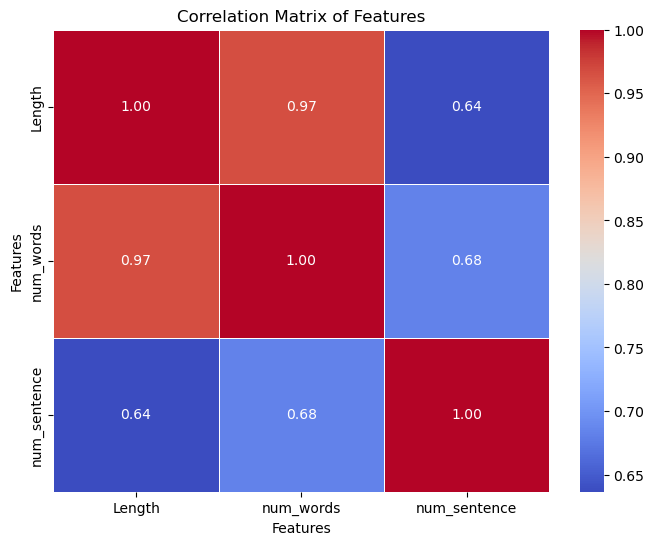

In [14]:
correlation_matrix = data[['Length', 'num_words', 'num_sentence']].corr()
print("The Relationship between Features are ",correlation_matrix )
plt.figure(figsize=(8, 6))
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# Message Preprocessing

In [15]:
lemma= WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [lemma.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    return ' '.join(words)


data['Cleaned_Message'] = data['Message'].apply(preprocess_text)

In [16]:
data.sample(5)

,Category,Message,Length,num_sentence,num_words,Cleaned_Message
3048,ham,"Ok. Not much to do here though. H&M Friday, ca...",149,4,39,ok much though h friday cant wait dunno wot he...
451,ham,hanks lotsly!,13,1,3,hank lotsly
942,ham,Theyre doing it to lots of places. Only hospit...,78,2,16,theyre lot place hospital medical place safe
1203,ham,"Me also da, i feel yesterday night wait til 2...",61,1,14,also da feel yesterday night wait til 2day nig...
4944,ham,Check mail.i have mailed varma and kept copy t...,95,1,15,check mail mailed varma kept copy regarding me...


# TF-IDF Metric

In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features=2500, ngram_range=(1, 3))
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Cleaned_Message'])

#  Category label encoder

In [18]:
label=LabelEncoder()
data["Category"]=label.fit_transform(data["Category"])
data.sample(5)

,Category,Message,Length,num_sentence,num_words,Cleaned_Message
1428,0,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...,126,3,29,thing r good thanx got exam march ive done rev...
4870,0,1. Tension face 2. Smiling face 3. Waste face ...,158,5,36,1 tension face 2 smiling face 3 waste face 4 i...
5001,0,Well its not like you actually called someone ...,78,2,16,well like actually called someone punto woulda...
5520,0,No. I dont want to hear anything,32,2,8,dont want hear anything
4064,0,How are you. Its been ages. How's abj,37,3,11,age abj


# Splitng the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data["Category"], test_size=0.2, random_state=42)

# models and evaluation

In [20]:
dic={
"Naive":MultinomialNB(),
"Logistic Regression":LogisticRegression(random_state=0),
"KNN":KNeighborsClassifier(n_neighbors=5),
"Decision Tree":DecisionTreeClassifier(random_state=0,max_depth=8),
"Random Forest":RandomForestClassifier(random_state=0),
}

model_names = []
accuracies = []

for name ,i in dic.items():
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    
    model_names.append(name)
    accuracies.append(acc)
    
    print(name)
    print("# Accuracy --->",  acc)
    print("# mean_squared_error--->",mean_squared_error(y_test, y_pred))
    print("# classification_report: \n",classification_report(y_test, y_pred))
    print("# confusion_matrix:  \n",confusion_matrix(y_test, y_pred))
    print("***************************************************************")
    

Naive
# Accuracy ---> 98.15891472868216
# mean_squared_error---> 0.018410852713178296
# classification_report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.87      0.93       136

    accuracy                           0.98      1032
   macro avg       0.99      0.93      0.96      1032
weighted avg       0.98      0.98      0.98      1032

# confusion_matrix:  
 [[895   1]
 [ 18 118]]
***************************************************************
Logistic Regression
# Accuracy ---> 96.60852713178295
# mean_squared_error---> 0.03391472868217054
# classification_report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.96      0.77      0.86       136

    accuracy                           0.97      1032
   macro avg       0.96      0.88      0.92      1032
weighted avg       0.97      0.97      0.96      103

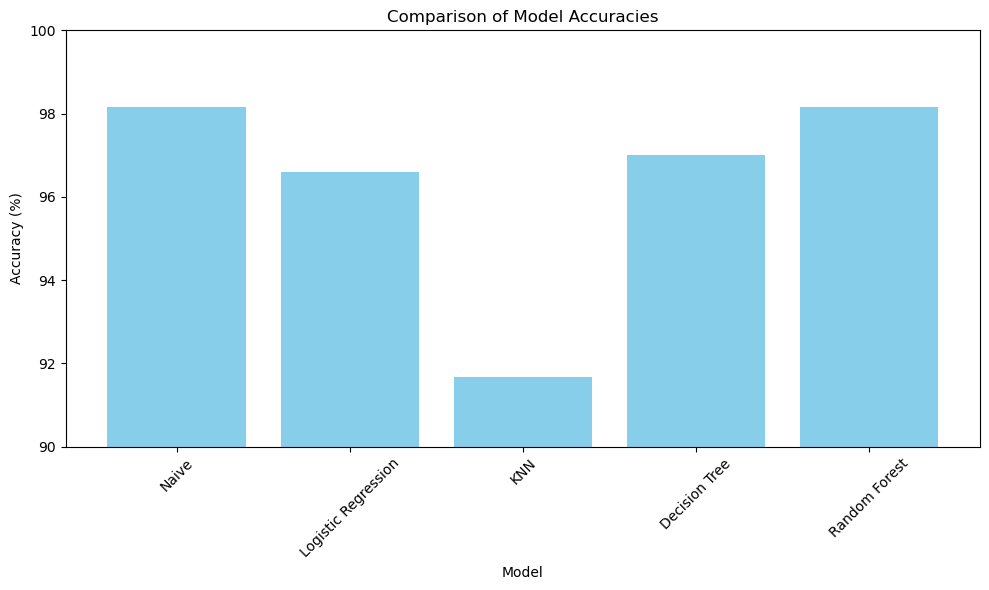

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(90, 100)  
plt.tight_layout()
plt.show()

In [22]:
new_emails = [
    "Get a free iPhone now!",
    "Hey, how's it going?",
    "Congratulations! You've won a prize!",
    "Reminder: Meeting at 2 PM tomorrow."
]

new_X = tfidf_vectorizer.transform(new_emails)
new_X_dense = new_X.toarray()

nb_predictions = dic["Naive"].predict(new_X_dense)

for email, prediction in zip(new_emails, nb_predictions):
    if prediction == 1:
        print(f"'{email}' is predicted as spam.")
    else:
        print(f"'{email}' is predicted as ham.")

'Get a free iPhone now!' is predicted as ham.
'Hey, how's it going?' is predicted as ham.
'Congratulations! You've won a prize!' is predicted as spam.
'Reminder: Meeting at 2 PM tomorrow.' is predicted as ham.


In [26]:
train_preds = dic["Naive"].predict(X_train)
test_preds = dic["Naive"].predict(X_test)

train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Test Accuracy: 0.98
